**About dataset**:-
World happiness report is a publication company based out united state. it conducts the survey about how much a contry is happy basis on certain parameters. They have created an imaginery country dystopia which is worst in term of happiness score and that is considered a banchmark against which all the countries can be compared...
dataset has 12 coulumn including target column. happiness_Score is the target variable. This is the regression problem.   

In [1]:
# importing all important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Pandas is helping to load the dataset from csv and loaded in whr_data 
whr_data = pd.read_csv("happiness_score_dataset.csv")
whr_data.sample(5) # check 5 random observation from the dataset 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
49,Italy,Western Europe,50,5.948,0.03914,1.25114,1.19777,0.95446,0.26236,0.02901,0.22823,2.02518
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
107,Palestinian Territories,Middle East and Northern Africa,108,4.715,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,0.11251,2.04384
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319


In [3]:
whr_data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


dataset has 158 entires and 12 columns. 2 columns's  datatype is object and rest are all numarical columns. 

In [4]:
whr_data.info() # .info method is used to check the information about the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

dataset has 158 entires and 12 columns. 2 columns's datatype is object and rest are all numarical columns.

> There is no missing value in any of the column



In [5]:
whr_data.describe() # to check the descriptive statistical 

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1.   All the variable are ranging between 0 to 10 except happiness rank


> 

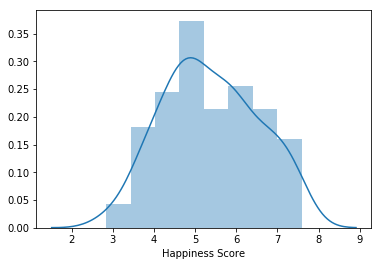

In [6]:
sns.distplot(whr_data["Happiness Score"], kde = True)

happiness score cloumn is right skewed distribution 

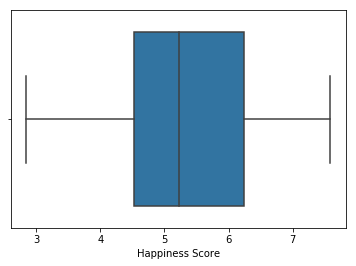

In [7]:
sns.boxplot(whr_data["Happiness Score"])

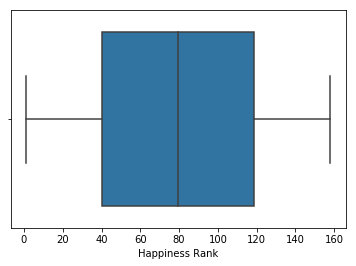

In [8]:
sns.boxplot(whr_data["Happiness Rank"])

Happiness score and rank dont have any outlier

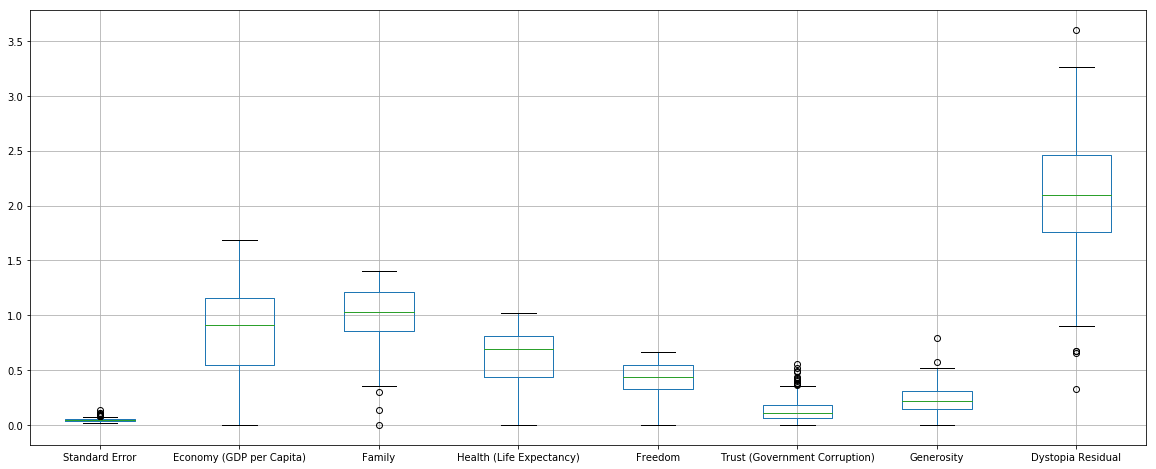

In [9]:
whr_data.iloc[:,4::].boxplot(figsize=[20,8])

standard error, family, trust, generosity and dystopia are consist of extremly  values.

In [10]:
#calculating the zscore 
#taking all the numeric columns 
z_score =  np.abs(zscore(whr_data[['Happiness Rank','Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]))


In [11]:
# keep all the data point within 3 standard deiavtion to ensure that we should not have extreme value

new_dataset = whr_data[['Happiness Rank','Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']][(z_score <3).all(axis = 1)] 

In [12]:
# 9 observations have been removed from the data 
new_dataset.shape

(149, 10)

In [13]:
# we are checking the skewness in the data 
print(new_dataset.skew())

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64


skewness is well undercontrol considering 5% threshold 

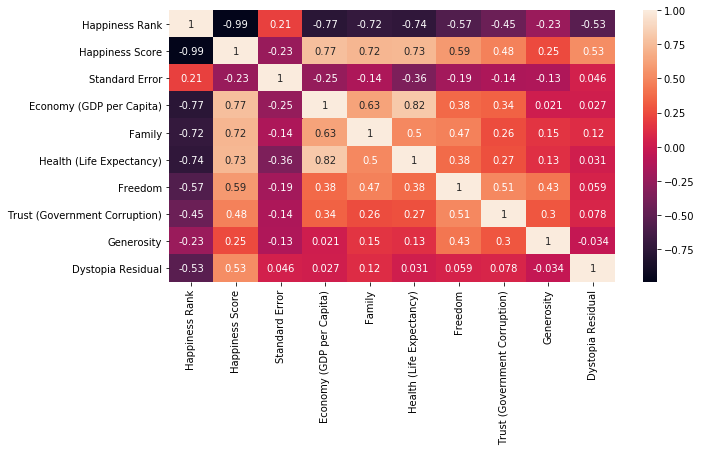

In [14]:
# correlation plot for checking the relation between indepent and dependent variable
plt.figure(figsize=(10,5))
sns.heatmap(new_dataset.corr(),annot=True)



1.   Happiness rank has stron negative corration wth happiness score. 
2.   features like Economy,family,health freedom and dystopia have positive correlated with target feature



In [15]:
# spliting the data
X_train,X_test,y_train,y_test = train_test_split(new_dataset.drop(['Happiness Score','Happiness Rank'],axis =1),new_dataset["Happiness Score"],test_size = .20, random_state =45)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(119, 8) (30, 8) (119,) (30,)


1. data has been splitted into train and test<br>2. not considering the country and country region columns as after converting them into number it will be only a count which dont make any sence to model along with Rank columns 

In [16]:
models = [DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]

In [17]:
n = len(X_train)
k = X_train.shape[1]

# R2adj=1−[(1−R2)(n−1)n−k−1]

In [18]:
for i in models:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("mean_squared_error", i, mean_squared_error(pred,y_test))
    print("R_square",i, r2_score(pred,y_test))
    print("\n")

mean_squared_error DecisionTreeRegressor() 0.24702586666666673
R_square DecisionTreeRegressor() 0.8041187357753155


mean_squared_error SVR() 0.011815071555352804
R_square SVR() 0.9908220030240338


mean_squared_error RandomForestRegressor() 0.13216971893999999
R_square RandomForestRegressor() 0.8702510416979088


mean_squared_error KNeighborsRegressor() 0.05280793733333331
R_square KNeighborsRegressor() 0.953936384557839




SVR with rbf kernal is giving high accuarcy among all Algorithm 

In [19]:
svr = SVR()
svr.fit(X_train,y_train)
predict = svr.predict(X_test)
r2_score = r2_score(predict,y_test)
mean_squared_error = mean_squared_error(predict,y_test)
print("r2_score",r2_score)
print("mean_squared_error",mean_squared_error)

r2_score 0.9908220030240338
mean_squared_error 0.011815071555352804


In [20]:
import joblib
joblib.dump(svr,"World_happines_report")
model = joblib.load("World_happines_report")